# Tutorial 3

This tutorial is an example of a possible BDT built with XGBoost library. [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/)

## Table of contents
- Data loading and reading
- Data preparation
- Cross Validation
- Training
- Predictions and plotting

## Data loading and reading

We will use the dataset provided for the Kaggle Higgs challenge. The dataset can be easily downloaded by using the function get_data that saves a copy ('data.csv') in the current repository.

In [1]:
import requests
from program import get_data
data_file = get_data("https://www.dropbox.com/s/dr64r7hb0fmy76p/atlas-higgs-challenge-2014-v2.csv?dl=1")

Using TensorFlow backend.


Writing dataset on disk


In [2]:
import pandas as pd
df = pd.read_csv('data.csv')

# Data preparation

EventId column is useless because pandas.dataframe has a default index:

In [3]:
df.drop('EventId', axis=1, inplace=True)

Label encoding:

In [4]:
from program import Label_to_Binary
df['Label'] = Label_to_Binary(df['Label'])

Test/train splits:

In [5]:
y = df['Label']
df.drop('Weight', axis=1 ,inplace=True)
df.drop('Label', axis=1 ,inplace=True)
df.drop('KaggleSet', axis=1 ,inplace=True)
df.drop('KaggleWeight', axis=1 ,inplace=True)
X = df

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('Class proportions:', np.bincount(y_train))

Class proportions: [377074 195692]


Loading the Pandas data frame into DMatrix. Note that missing values can be replaced by a default value in the DMatrix constructor.

In [7]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train, missing = -999.0)
dtest = xgb.DMatrix(data = X_test, label = y_test, missing = -999.0)

# Cross Validation

It's important to measure the model's predictive power and the overfitting degree before training. So changing the values in CVparams the hyperparameters can be tuned using cross validation and the best values can be founded. Here are reported two different examples of cross validation parameters.

In [8]:
import numpy as np
from program import cross_validation
seed = 123
np.random.seed(seed)

CVparams1 = {'objective' : 'binary:logistic',
             'max_depth' : 9,
             'min_child_weight' : 7,
             'gamma' : 0,
             'subsample' : 0.9,
             'colsample_bytree' : 0.5,
             'eta' : 0.1,
             'eval_metric' : 'auc',
             'nthread' : 16}
res = cross_validation(seed, dtrain, CVparams1)

[0]	train-auc:0.83172+0.00021	test-auc:0.82573+0.00122
[1]	train-auc:0.86243+0.02292	test-auc:0.85621+0.02329
[2]	train-auc:0.88570+0.01084	test-auc:0.87959+0.01074
[3]	train-auc:0.89107+0.00876	test-auc:0.88499+0.00866
[4]	train-auc:0.89643+0.00460	test-auc:0.89042+0.00451
[5]	train-auc:0.89792+0.00429	test-auc:0.89165+0.00419
[6]	train-auc:0.90164+0.00244	test-auc:0.89547+0.00235
[7]	train-auc:0.90253+0.00314	test-auc:0.89626+0.00326
[8]	train-auc:0.90435+0.00223	test-auc:0.89796+0.00210
[9]	train-auc:0.90556+0.00144	test-auc:0.89907+0.00119
[10]	train-auc:0.90644+0.00125	test-auc:0.89980+0.00122
[11]	train-auc:0.90695+0.00122	test-auc:0.90014+0.00148
[12]	train-auc:0.90790+0.00078	test-auc:0.90095+0.00098
[13]	train-auc:0.90869+0.00071	test-auc:0.90168+0.00080
[14]	train-auc:0.90918+0.00068	test-auc:0.90202+0.00100
[15]	train-auc:0.90990+0.00059	test-auc:0.90263+0.00090
[16]	train-auc:0.91054+0.00048	test-auc:0.90314+0.00092
[17]	train-auc:0.91114+0.00045	test-auc:0.90363+0.00079
[1

In [9]:
print('CV results'"\n", res)

CV results
      train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.831718       0.000214       0.825730      0.001218
1          0.862431       0.022916       0.856209      0.023295
2          0.885695       0.010844       0.879589      0.010739
3          0.891066       0.008763       0.884992      0.008657
4          0.896430       0.004596       0.890415      0.004509
..              ...            ...            ...           ...
229        0.939732       0.000478       0.913307      0.000590
230        0.939774       0.000474       0.913308      0.000587
231        0.939846       0.000474       0.913312      0.000593
232        0.939922       0.000475       0.913313      0.000591
233        0.939966       0.000490       0.913316      0.000590

[234 rows x 4 columns]


In [10]:
CVparams2 = {'objective' : 'binary:logistic',
             'max_depth' : 9,
             'min_child_weight' : 5, 
             'gamma' : 0, 
             'subsample' : 0.6,
             'colsample_bytree' : 0.8, 
             'eta' : 0.1,
             'eval_metric' : 'auc',
             'nthread' : 16}
res = cross_validation(seed, dtrain, CVparams2)

[0]	train-auc:0.87723+0.00055	test-auc:0.87199+0.00089
[1]	train-auc:0.89245+0.00491	test-auc:0.88732+0.00533
[2]	train-auc:0.89802+0.00080	test-auc:0.89277+0.00126
[3]	train-auc:0.90092+0.00098	test-auc:0.89546+0.00068
[4]	train-auc:0.90229+0.00105	test-auc:0.89672+0.00137
[5]	train-auc:0.90400+0.00040	test-auc:0.89845+0.00086
[6]	train-auc:0.90518+0.00022	test-auc:0.89957+0.00076
[7]	train-auc:0.90602+0.00044	test-auc:0.90035+0.00068
[8]	train-auc:0.90695+0.00046	test-auc:0.90110+0.00067
[9]	train-auc:0.90753+0.00047	test-auc:0.90159+0.00073
[10]	train-auc:0.90826+0.00038	test-auc:0.90215+0.00072
[11]	train-auc:0.90884+0.00037	test-auc:0.90254+0.00077
[12]	train-auc:0.90939+0.00034	test-auc:0.90295+0.00071
[13]	train-auc:0.90999+0.00028	test-auc:0.90339+0.00063
[14]	train-auc:0.91047+0.00028	test-auc:0.90373+0.00059
[15]	train-auc:0.91100+0.00026	test-auc:0.90414+0.00061
[16]	train-auc:0.91151+0.00020	test-auc:0.90452+0.00065
[17]	train-auc:0.91200+0.00014	test-auc:0.90486+0.00069
[1

In [11]:
print('CV results'"\n", res)

CV results
      train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.877226       0.000555       0.871992      0.000886
1          0.892448       0.004906       0.887324      0.005327
2          0.898021       0.000803       0.892767      0.001262
3          0.900918       0.000980       0.895465      0.000679
4          0.902292       0.001051       0.896723      0.001365
..              ...            ...            ...           ...
184        0.936999       0.000196       0.912945      0.000561
185        0.937061       0.000182       0.912953      0.000567
186        0.937137       0.000200       0.912949      0.000562
187        0.937205       0.000207       0.912953      0.000561
188        0.937292       0.000199       0.912954      0.000557

[189 rows x 4 columns]


## Training

Once we have founded the best values of the parameters we will use them to train the BDT deciding the value of *num_round*, which is the number of boosting iterations.

In [12]:
num_round = 900
params = CVparams1
bst = xgb.train(params, dtrain, num_round)

## Predictions and plotting

To measure the classification performance we can compute Receiver operating characteristic (ROC) and the roc_auc_score using scikit-learn library. (The roc_auc_score corresponds to area under the ROC curve.)

0.9116770778782832


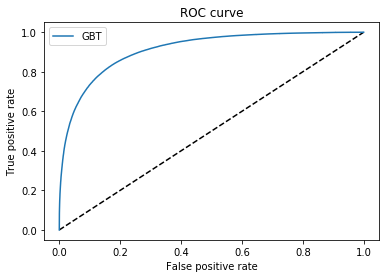

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
preds = bst.predict(dtest)
y_pred = preds.astype(float)
y_test = y_test.astype(int)
fpr, tpr, _ = roc_curve(y_test, y_pred)
print('roc_auc_score',roc_auc_score(y_test, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='BDT')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

To see features ordered by their importance we can use a built-in function of XGBoost.

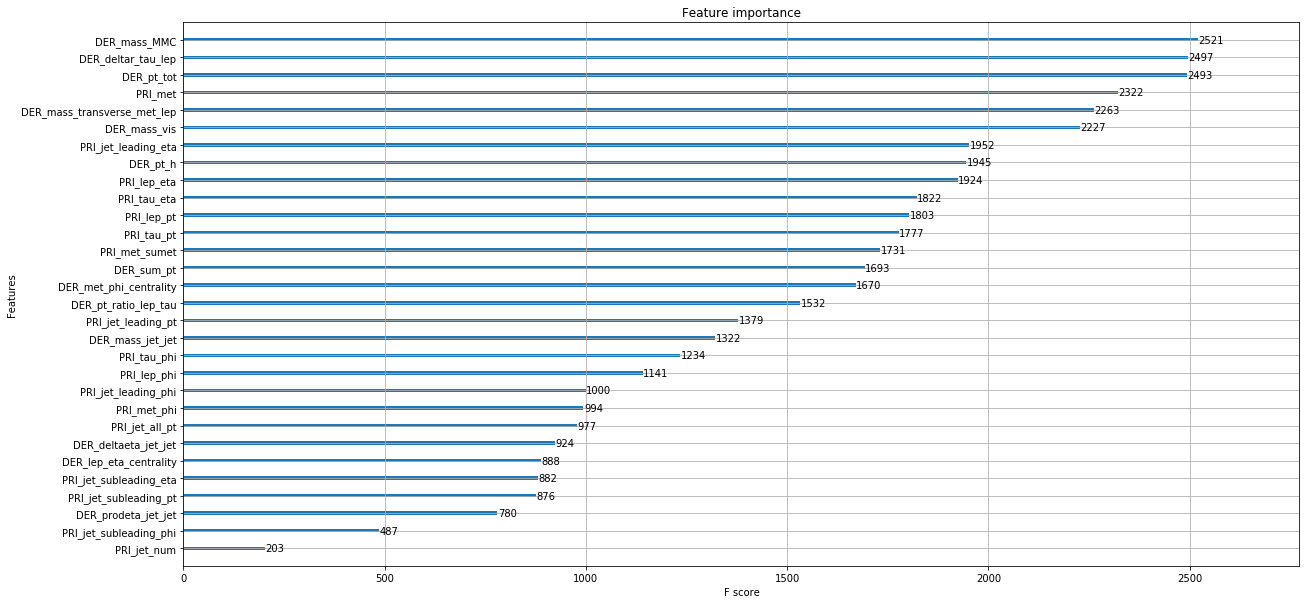

In [11]:
import matplotlib.pyplot as plt
xgb.plot_importance(bst)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()